In [1]:
import numpy as np
from nilearn import plotting, datasets, surface
from glob import glob

In [2]:
fig_dir = '../figs/'

In [3]:
example_maps = glob('../results/*ALL_COORDS.nii.gz')

In [4]:
for map_ in example_maps:
    g = plotting.plot_stat_map(map_, colorbar=False, title=map_, cut_coords=(0,0,0))
    g.savefig('{0}/{1}.png'.format(fig_dir,map_[:-7]))

In [5]:
z_maps = glob('../results/brain-maps/*z*voxel*.nii.gz')

In [6]:
cmaps = ['PuRd', 'BuPu','GnBu', 'BuGn', 'OrRd']

/Users/kbottenh/Library/Python/3.7/lib/python/site-packages/nilearn/plotting/surf_plotting.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure()
/Users/kbottenh/Library/Python/3.7/lib/python/site-packages/nilearn/plotting/displays.py:602: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


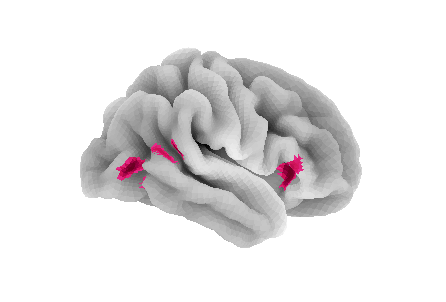

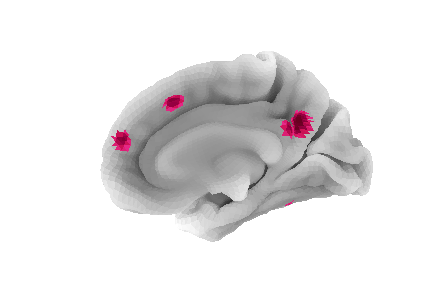

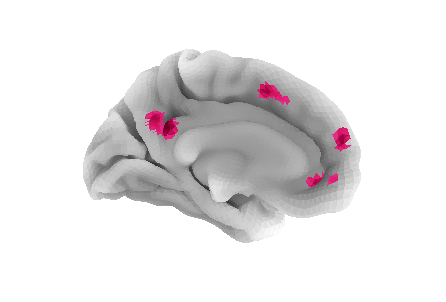

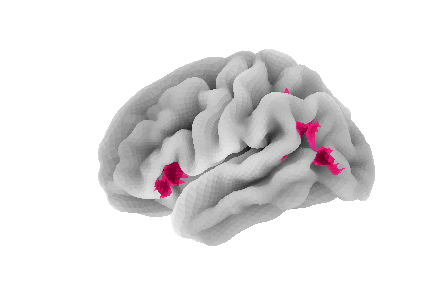

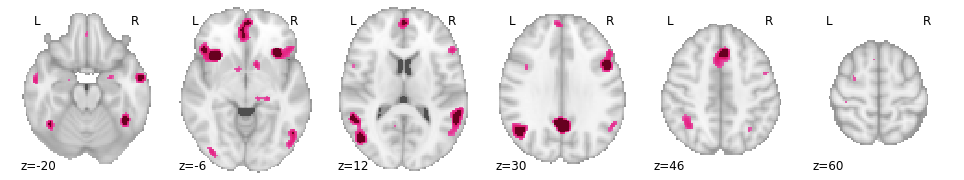

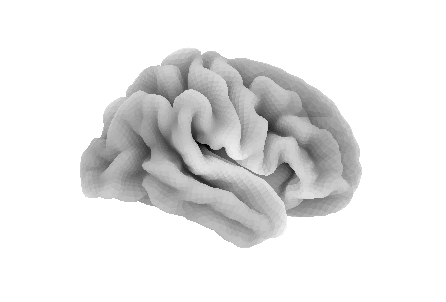

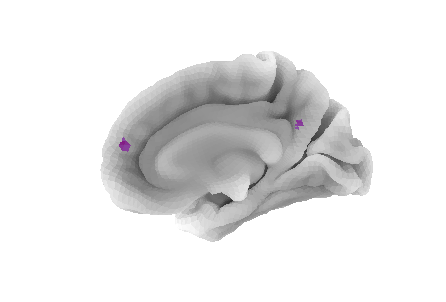

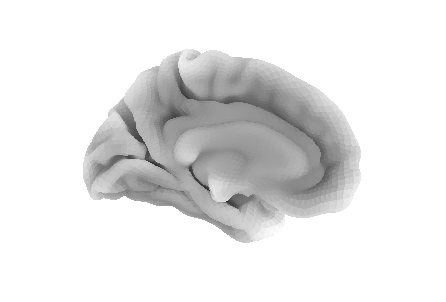

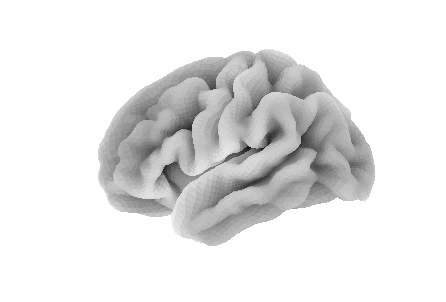

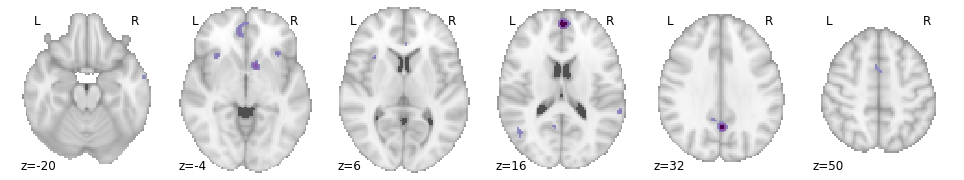

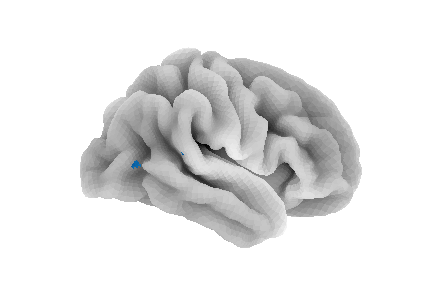

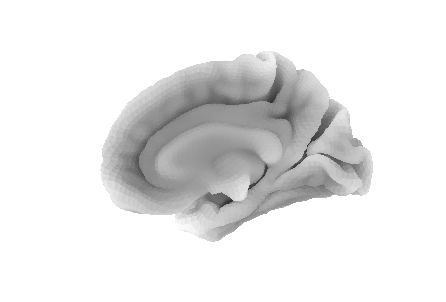

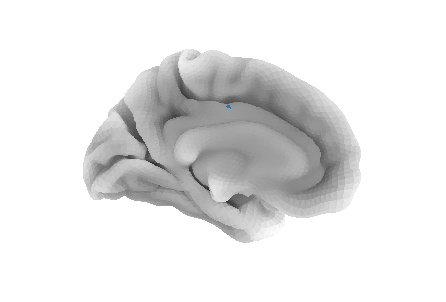

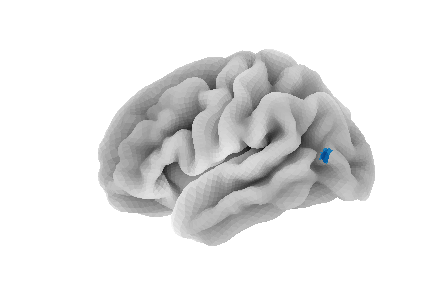

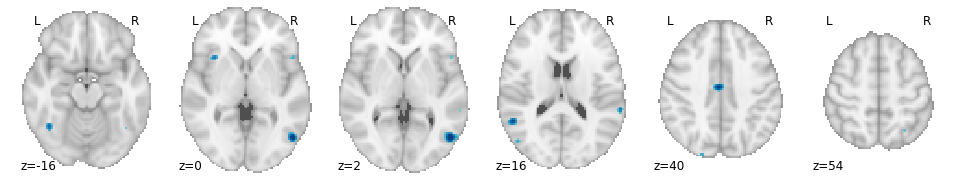

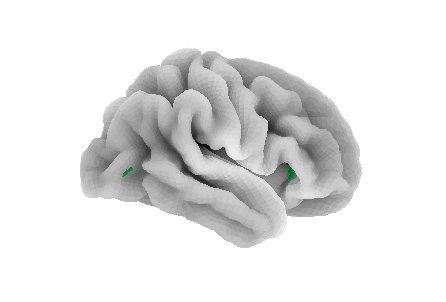

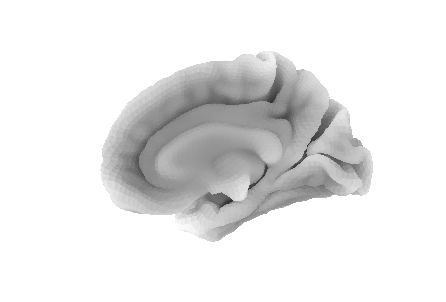

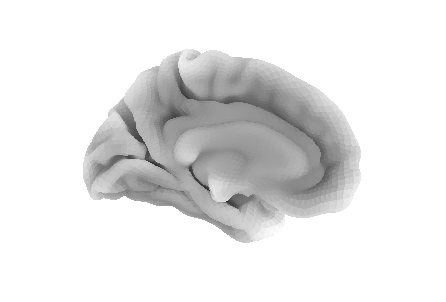

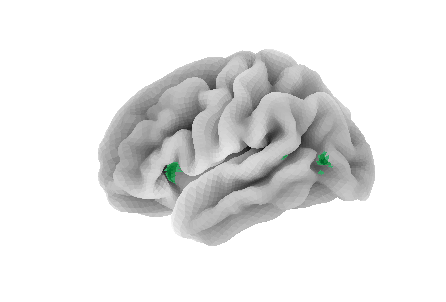

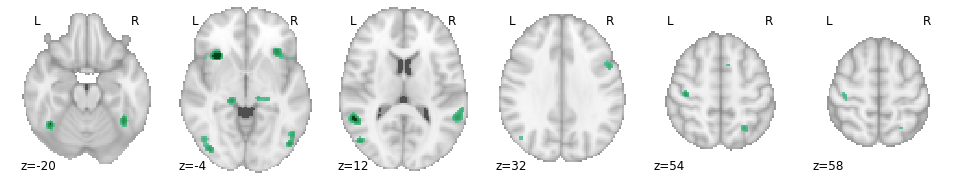

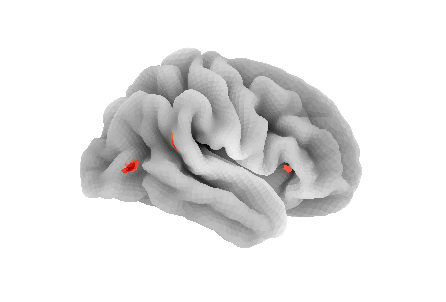

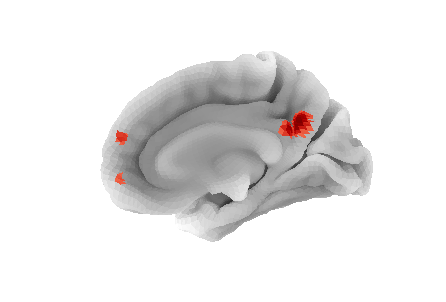

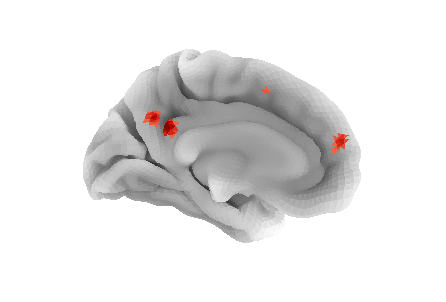

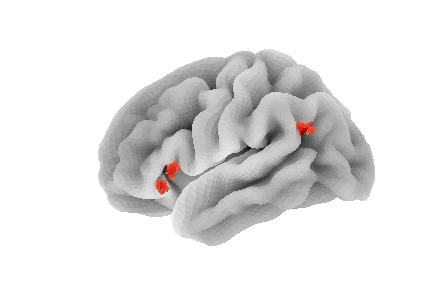

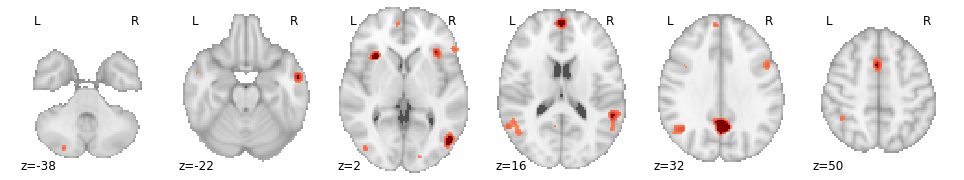

In [7]:
#make the surface + slices plots!
fsaverage = datasets.fetch_surf_fsaverage()


for i in np.arange(0, len(z_maps)):
    r_texture = surface.vol_to_surf(z_maps[i], fsaverage.pial_right)
    l_texture = surface.vol_to_surf(z_maps[i], fsaverage.pial_left)
    h = plotting.plot_surf_stat_map(fsaverage.pial_right, r_texture, 
                                    colorbar=False, cmap=cmaps[i], threshold=2, 
                                    bg_map=fsaverage.sulc_right, view='medial')
    h.savefig('{0}/{1}-SURF-RL.png'.format(fig_dir,z_maps[i][:-7]), dpi=300)
    h = plotting.plot_surf_stat_map(fsaverage.pial_right, r_texture, 
                                    colorbar=False, cmap=cmaps[i], threshold=2, 
                                    bg_map=fsaverage.sulc_right, view='lateral')
    h.savefig('{0}/{1}-SURF-RM.png'.format(fig_dir,z_maps[i][:-7]), dpi=300)
    h = plotting.plot_surf_stat_map(fsaverage.pial_left, l_texture, 
                                    colorbar=False, cmap=cmaps[i], threshold=2, 
                                    bg_map=fsaverage.sulc_left, view='medial')
    h.savefig('{0}/{1}-SURF-LM.png'.format(fig_dir,z_maps[i][:-7]), dpi=300)
    h = plotting.plot_surf_stat_map(fsaverage.pial_left, l_texture, 
                                    colorbar=False, cmap=cmaps[i], threshold=2, 
                                    bg_map=fsaverage.sulc_left, view='lateral')
    h.savefig('{0}/{1}-SURF-LL.png'.format(fig_dir,z_maps[i][:-7]), dpi=300)
    g = plotting.plot_stat_map(z_maps[i], colorbar=False, 
                               display_mode='z', cut_coords=6,
                               cmap=cmaps[i], draw_cross=False)
    g.savefig('{0}/{1}-SLICE.png'.format(fig_dir,z_maps[i][:-7]), dpi=300)

In [8]:
g

/Users/kbottenh/Library/Python/3.7/lib/python/site-packages/numpy/ma/core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


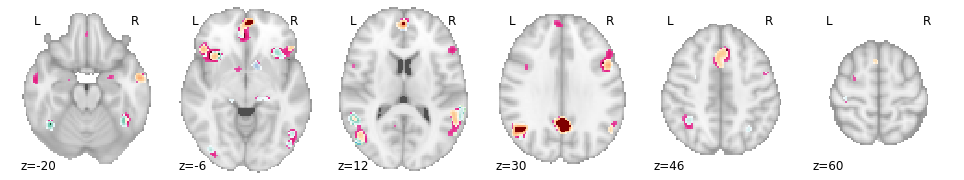

In [9]:
g = plotting.plot_stat_map(z_maps[0], colorbar=False, cmap=cmaps[0], display_mode='z', cut_coords=6)
g.add_overlay(z_maps[1], cmap=cmaps[1])
g.add_overlay(z_maps[2], cmap=cmaps[2])
g.add_overlay(z_maps[3], cmap=cmaps[3])
g.add_overlay(z_maps[4], cmap=cmaps[4])
g.savefig('all_maps.png', dpi=300)

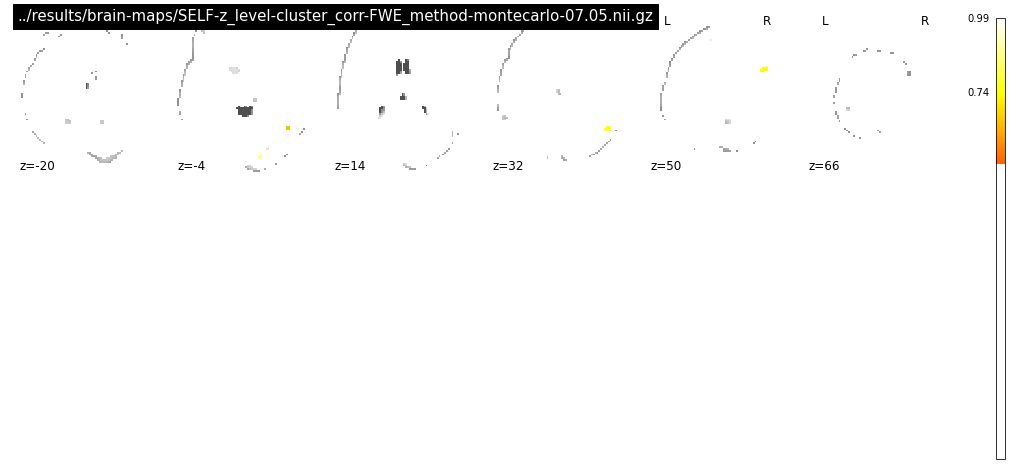

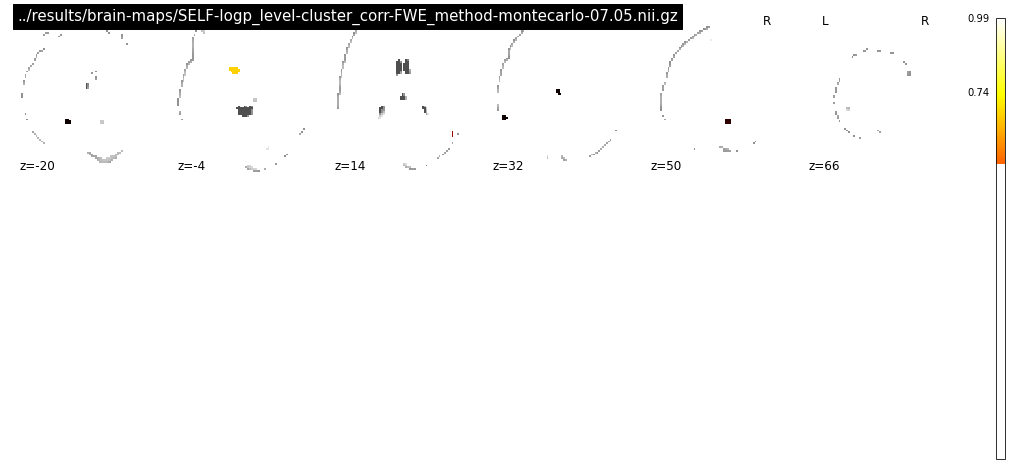

In [29]:
z_maps = glob('../results/brain-maps/SELF*cluster*.nii.gz')
for i in np.arange(0, len(z_maps)):
    g = plotting.plot_stat_map(z_maps[i], colorbar=True, 
                               display_mode='z', cut_coords=[-20, -4, 14, 32, 50, 66],
                               draw_cross=False, title=z_maps[i], vmax=0.99)
    g.savefig('/Users/kbottenh/Dropbox/Projects/metas/ro-flux//{0}.png'.format(z_maps[i][:-7]), dpi=300)

In [30]:
import nimare as nim
nim.__version__

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


200710-14:19:35,903 nipype.utils INFO:
	 Running nipype version 1.4.2 (latest: 1.5.0)


INFO:nipype.utils:Running nipype version 1.4.2 (latest: 1.5.0)


'0.0.2+14.g7f7a865'